In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2022.csv
/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv
/kaggle/input/ipl-2024-matches/ipl2024 Matches.csv


In [4]:
data_2024 = pd.read_csv('/kaggle/input/ipl-2024-matches/ipl2024 Matches.csv')
data_2008_2022 = pd.read_csv('/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv')

In [5]:
columns_to_keep = ['team1', 'team2', 'toss_winner', 'decision', 'winner']
data_2024 = data_2024[columns_to_keep]

In [6]:
columns_to_keep = ['Team1', 'Team2', 'TossWinner', 'TossDecision', 'WinningTeam']
data_2008_2022 = data_2008_2022[columns_to_keep]

In [7]:
data_2008_2022.head()

,Team1,Team2,TossWinner,TossDecision,WinningTeam
0,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore
3,Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,Punjab Kings


In [8]:
data_2024.head()

,team1,team2,toss_winner,decision,winner
0,Banglore,Chennai,Banglore,Bat,Chennai
1,Delhi,Punjab,Punjab,Field,Punjab
2,Kolkata,Hyderabad,Hyderabad,Field,Kolkata
3,Rajasthan,Lucknow,Rajasthan,Bat,Rajasthan
4,Gujarat,Mumbai,Mumbai,Field,Gujarat


In [9]:
data_2024 = data_2024[data_2024['winner'] != 'Abandoned']

In [10]:
print('Number of unique values in toss_winner:', data_2008_2022['WinningTeam'].value_counts().to_dict())

Number of unique values in toss_winner: {'Mumbai Indians': 131, 'Chennai Super Kings': 121, 'Kolkata Knight Riders': 114, 'Royal Challengers Bangalore': 109, 'Rajasthan Royals': 96, 'Kings XI Punjab': 88, 'Sunrisers Hyderabad': 75, 'Delhi Daredevils': 67, 'Delhi Capitals': 36, 'Deccan Chargers': 29, 'Gujarat Lions': 13, 'Punjab Kings': 13, 'Pune Warriors': 12, 'Gujarat Titans': 12, 'Rising Pune Supergiant': 10, 'Lucknow Super Giants': 9, 'Kochi Tuskers Kerala': 6, 'Rising Pune Supergiants': 5}


In [11]:
data_2008_2022['TossWinner'] = data_2008_2022.apply(lambda row: 0 if row['TossWinner'] == row['Team1'] else 1, axis=1)
data_2008_2022['WinningTeam'] = data_2008_2022.apply(lambda row: 0 if row['WinningTeam'] == row['Team1'] else 1, axis=1)

In [12]:
data_2024['toss_winner'] = data_2024.apply(lambda row: 0 if row['toss_winner'] == row['team1'] else 1, axis=1)
data_2024['winner'] = data_2024.apply(lambda row: 0 if row['winner'] == row['team1'] else 1, axis=1)

In [13]:
data_2024.head()

,team1,team2,toss_winner,decision,winner
0,Banglore,Chennai,0,Bat,1
1,Delhi,Punjab,1,Field,1
2,Kolkata,Hyderabad,1,Field,0
3,Rajasthan,Lucknow,0,Bat,0
4,Gujarat,Mumbai,1,Field,0


In [14]:
data_2008_2022.head()

,Team1,Team2,TossWinner,TossDecision,WinningTeam
0,Rajasthan Royals,Gujarat Titans,0,bat,1
1,Royal Challengers Bangalore,Rajasthan Royals,1,field,1
2,Royal Challengers Bangalore,Lucknow Super Giants,1,field,0
3,Rajasthan Royals,Gujarat Titans,1,field,1
4,Sunrisers Hyderabad,Punjab Kings,0,bat,1


In [15]:
data_2008_2022['TossDecision'] = data_2008_2022['TossDecision'].str.lower().map({'bat': 1, 'field': 0})

In [16]:
data_2024['decision'] = data_2024['decision'].str.lower().map({'bat': 1, 'field': 0})

In [17]:
data_2024.head()

,team1,team2,toss_winner,decision,winner
0,Banglore,Chennai,0,1,1
1,Delhi,Punjab,1,0,1
2,Kolkata,Hyderabad,1,0,0
3,Rajasthan,Lucknow,0,1,0
4,Gujarat,Mumbai,1,0,0


In [18]:
data_2008_2022.head()

,Team1,Team2,TossWinner,TossDecision,WinningTeam
0,Rajasthan Royals,Gujarat Titans,0,1,1
1,Royal Challengers Bangalore,Rajasthan Royals,1,0,1
2,Royal Challengers Bangalore,Lucknow Super Giants,1,0,0
3,Rajasthan Royals,Gujarat Titans,1,0,1
4,Sunrisers Hyderabad,Punjab Kings,0,1,1


In [19]:
print('Number of unique values in toss_winner:', data_2008_2022['Team1'].value_counts().to_dict())

Number of unique values in toss_winner: {'Royal Challengers Bangalore': 126, 'Mumbai Indians': 112, 'Chennai Super Kings': 111, 'Kolkata Knight Riders': 105, 'Kings XI Punjab': 92, 'Rajasthan Royals': 89, 'Delhi Daredevils': 85, 'Sunrisers Hyderabad': 69, 'Deccan Chargers': 39, 'Delhi Capitals': 29, 'Pune Warriors': 23, 'Punjab Kings': 18, 'Gujarat Lions': 16, 'Lucknow Super Giants': 8, 'Gujarat Titans': 7, 'Rising Pune Supergiant': 7, 'Rising Pune Supergiants': 7, 'Kochi Tuskers Kerala': 7}


In [20]:
print('Number of unique values in toss_winner:', data_2024['team1'].value_counts().to_dict())

Number of unique values in toss_winner: {'Hyderabad': 10, 'Banglore': 9, 'Kolkata': 9, 'Chennai': 8, 'Lucknow': 8, 'Delhi': 7, 'Gujarat': 6, 'Rajasthan': 5, 'Mumbai': 5, 'Punjab': 4}


In [21]:
team_mapping = {
    'Hyderabad': ['Sunrisers Hyderabad','Deccan Chargers'],
    'Banglore': 'Royal Challengers Bangalore',
    'Kolkata': 'Kolkata Knight Riders',
    'Chennai': 'Chennai Super Kings',
    'Lucknow': 'Lucknow Super Giants',
    'Delhi': ['Delhi Daredevils', 'Delhi Capitals'],
    'Gujarat': ['Gujarat Lions', 'Gujarat Titans'],
    'Rajasthan': 'Rajasthan Royals',
    'Mumbai': 'Mumbai Indians',
    'Punjab': ['Kings XI Punjab', 'Punjab Kings'],
    'Pune' : ['Pune Warriors','Rising Pune Supergiant','Rising Pune Supergiants'],
    'Kerala' : ['Kochi Tuskers Kerala']
}

In [22]:
def standardize_team_names(team_name):
    for key, values in team_mapping.items():
        if isinstance(values, list):
            if team_name in values:
                return key
        elif team_name == values:
            return key
    return team_name

In [23]:
data_2008_2022['Team1'] = data_2008_2022['Team1'].apply(standardize_team_names)
data_2008_2022['Team2'] = data_2008_2022['Team2'].apply(standardize_team_names)

In [24]:
data_2008_2022.head()

,Team1,Team2,TossWinner,TossDecision,WinningTeam
0,Rajasthan,Gujarat,0,1,1
1,Banglore,Rajasthan,1,0,1
2,Banglore,Lucknow,1,0,0
3,Rajasthan,Gujarat,1,0,1
4,Hyderabad,Punjab,0,1,1


In [25]:
print('Number of unique values in toss_winner:', data_2008_2022['Team1'].value_counts().to_dict())

Number of unique values in toss_winner: {'Banglore': 126, 'Delhi': 114, 'Mumbai': 112, 'Chennai': 111, 'Punjab': 110, 'Hyderabad': 108, 'Kolkata': 105, 'Rajasthan': 89, 'Pune': 37, 'Gujarat': 23, 'Lucknow': 8, 'Kerala': 7}


In [26]:
data_2008_2022.rename(columns={
    'Team1': 'team1', 
    'Team2': 'team2', 
    'TossWinner': 'toss_winner', 
    'TossDecision': 'decision', 
    'WinningTeam': 'winner'
}, inplace=True)

In [27]:
data = pd.concat([data_2008_2022, data_2024], ignore_index=True)

In [28]:
data.head()

,team1,team2,toss_winner,decision,winner
0,Rajasthan,Gujarat,0,1,1
1,Banglore,Rajasthan,1,0,1
2,Banglore,Lucknow,1,0,0
3,Rajasthan,Gujarat,1,0,1
4,Hyderabad,Punjab,0,1,1


In [29]:
cols = ['toss_winner','decision','winner']
newdata = data[cols]

In [30]:
newdata.corr()

,toss_winner,decision,winner
toss_winner,1.000000,-0.377488,0.024915
decision,-0.377488,1.000000,-0.066709
winner,0.024915,-0.066709,1.000000


In [31]:
data.shape

(1021, 5)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()
data['team1_id'] = label_encoder.fit_transform(data['team1'])
data['team2_id'] = label_encoder.transform(data['team2'])

In [34]:
X = data[['team1_id', 'team2_id', 'toss_winner', 'decision']]
Y = data['winner']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
num_teams = len(team_mapping)
embedding_dim = 8

team1_input = Input(shape=(1,), name='team1_input')
team2_input = Input(shape=(1,), name='team2_input')
toss_input = Input(shape=(1,), name='toss_winner')
decision_input = Input(shape=(1,), name='decision')

In [38]:
team_embedding = Embedding(input_dim=num_teams, output_dim=embedding_dim, name='team_embedding')
team1_embed = Flatten()(team_embedding(team1_input))
team2_embed = Flatten()(team_embedding(team2_input))

In [39]:
combined = Concatenate()([team1_embed, team2_embed, toss_input, decision_input])

In [58]:
# x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(combined)
# x = Dropout(0.3)(x)
# x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
# x = Dropout(0.3)(x)
# output = Dense(1, activation='sigmoid')(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(combined)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

In [59]:
model = Model(inputs=[team1_input, team2_input, toss_input, decision_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ team1_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ team2_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ team_embedding            │ (None, 1, 8)           │             96 │ team1_input[0][0],     │
│ (Embedding)               │                        │                │ team2_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 8)              │              0 │ team_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 8)              │              0 │ team_embedding[1][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ toss_winner (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decision (InputLayer)     │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 18)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0],       │
│                           │                        │                │ toss_winner[0][0],     │
│                           │                        │                │ decision[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │          2,432 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 32)             │          2,080 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 32)             │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             33 │ dropout_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,897 (50.38 KB)

 Trainable params: 12,897 (50.38 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [62]:
history = model.fit(
    [X_train['team1_id'], X_train['team2_id'], X_train['toss_winner'], X_train['decision']],
    Y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=8,
    callbacks=[early_stopping]
)

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5331 - loss: 0.8370 - val_accuracy: 0.5366 - val_loss: 0.7813
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4948 - loss: 0.7745 - val_accuracy: 0.5183 - val_loss: 0.7505
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5032 - loss: 0.7504 - val_accuracy: 0.5183 - val_loss: 0.7336
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5276 - loss: 0.7316 - val_accuracy: 0.5366 - val_loss: 0.7249
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5403 - loss: 0.7228 - val_accuracy: 0.5061 - val_loss: 0.7211
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 0.7148 - val_accuracy: 0.5183 - val_loss: 0.7126
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5399 - loss: 0.7117 - val_accuracy: 0.5122 - val_loss: 0.7081
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5606 - loss: 0.7062 - val_accuracy: 0.5244 - val_loss:

In [63]:
import matplotlib.pyplot as plt

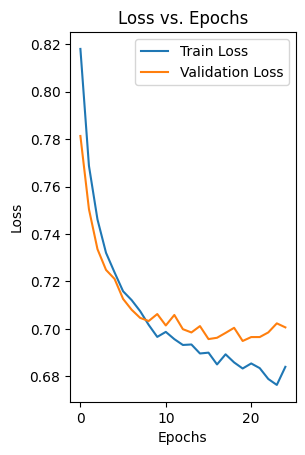

In [64]:
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

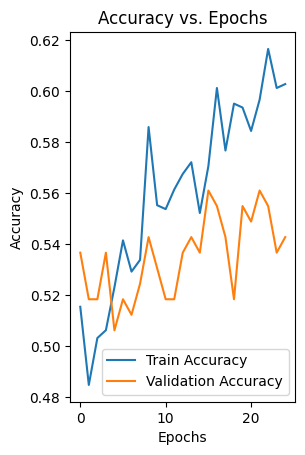

In [65]:
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()